<a href="https://colab.research.google.com/github/SaranyaRavikumar06/Itrain-Advance-Python/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(150, 4)
(112, 4)
(38, 4)
(112,)
(38,)
0.9736842105263158
[0.9736842105263158, 0.9210526315789473, 0.9736842105263158, 0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.9736842105263158, 0.9210526315789473, 0.9736842105263158, 0.9210526315789473, 0.9736842105263158, 0.9210526315789473, 0.9736842105263158, 0.9210526315789473, 0.9473684210526315, 0.9210526315789473, 0.9210526315789473, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.9210526315789473, 0.8947368421052632, 0.9210526315789473]
0.9210526315789473
[0.9736842105263158, 0.9210526315789473, 0.9736842105263158, 0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.9736842105263158, 0.9210526315789473, 0.9736842105263158, 0.9210526315789473, 0.9736842105263158, 0.9210526315789473, 0.9736842105263158, 0.9210526315789473, 0.9473684210526315, 0.9210526315789473, 0.9210526315789473, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0

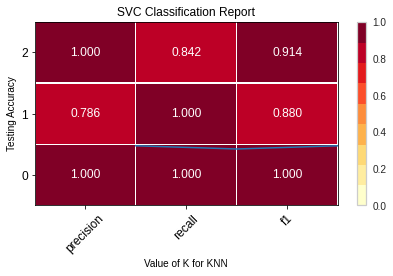

In [1]:

#This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray
#import sklearn as sk
from sklearn import datasets
#Load Datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target
print(X.shape)
Y

# Split and Randomize Data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=33)
X_train
X_test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
#How to choose the value of K
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range =range(1,26)
scores={}
scores_list=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred=knn.predict(X_test)
    scores[k]=metrics.accuracy_score(Y_test,Y_pred)
    scores_list.append(metrics.accuracy_score(Y_test,Y_pred))
    
for k in k_range:
     print(scores[k])
     print(scores_list)
#Plot and visualize the K values
import matplotlib.pyplot as plt
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')



# Step 2 Define Classifier

from sklearn.metrics import accuracy_score
from sklearn import svm

clf = svm.SVC()
# Step 3 Train the Classifier
clf.fit(X_train,Y_train)
# predict the response
pred = clf.predict(X_test)
# Step 4: # evaluate accuracy for classifier
print ("SVC accuracy score : ",accuracy_score(Y_test, pred))




# Step 5: Save the Model
import joblib
joblib.dump(clf, 'mymodel.pkl')
# Step 6: Load the Model & Prediction
clf = joblib.load('mymodel.pkl')
clf


#SAMPLE TESTING
classes={0:'setosa',1:'versicolor',2:'virginica'}
x_new=[[3,4,5,2],[5,4,2,2]]
y_predict=clf.predict(x_new)
print(classes[y_predict[0]])
print(classes[y_predict[1]])

#VISUALIZATION
#conda install -c districtdatalabs yellowbrick
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(clf, classes=[0,1,2])
visualizer.fit(X_train, Y_train) # Fit the training data to the visualizer
visualizer.score(X_test, Y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data
